In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [397]:
train_path = './data/train.csv'
test_path = './data/test.csv'

In [398]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

train_id = train.Id
test_id = test.Id

In [399]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [400]:
train['TotalHouseSF'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF'] + train['BsmtFinSF1'] + train['BsmtFinSF2'] + train['BsmtUnfSF'] + train['WoodDeckSF'] + train['OpenPorchSF'] + train['LowQualFinSF']
test['TotalHouseSF'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['TotalBsmtSF'] + test['BsmtFinSF1'] + test['BsmtFinSF2'] + test['BsmtUnfSF'] + test['WoodDeckSF'] + test['OpenPorchSF'] + test['LowQualFinSF']
print(train['TotalHouseSF'][0])

3483


In [401]:
train['LivingRoomsAbvGr'] = train['TotRmsAbvGrd'] - (train['BedroomAbvGr'] + train['KitchenAbvGr'])
train['TotalRoomsWithBathrooms'] = train['TotRmsAbvGrd'] + train['FullBath'] + train['HalfBath']
train['TotalRoomsFullHouse'] = train['TotalRoomsWithBathrooms'] + train['BsmtFullBath'] + train['BsmtHalfBath']

test['LivingRoomsAbvGr'] = test['TotRmsAbvGrd'] - (test['BedroomAbvGr'] + test['KitchenAbvGr'])
test['TotalRoomsWithBathrooms'] = test['TotRmsAbvGrd'] + test['FullBath'] + test['HalfBath']
test['TotalRoomsFullHouse'] = test['TotalRoomsWithBathrooms'] + test['BsmtFullBath'] + test['BsmtHalfBath']

print(train['TotalRoomsWithBathrooms'][0])
print(train['TotalRoomsFullHouse'][0])

print(test['TotalRoomsWithBathrooms'][0])
print(test['TotalRoomsFullHouse'][0])

11
12
6
6.0


In [402]:
print(train['LotArea'][0])
print(train['GrLivArea'][0])
print(train['GarageArea'][0])
print(train['PoolArea'][0])

8450
1710
548
0


In [403]:
numeric_data = train.select_dtypes(include=[np.number])
categorical_data = train.select_dtypes(exclude=[np.number])

numeric_data_test = test.select_dtypes(include=[np.number])
categorical_data_test = test.select_dtypes(exclude=[np.number])

print(numeric_data.shape[1])
print(categorical_data.shape[1])

42
43


In [404]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [405]:
print(test.isna().sum()[test.isna().sum() > 0].sort_values(ascending=False))

PoolQC                 1456
MiscFeature            1408
Alley                  1352
Fence                  1169
MasVnrType              894
FireplaceQu             730
GarageQual               78
GarageYrBlt              78
GarageFinish             78
GarageCond               78
GarageType               76
BsmtCond                 45
BsmtExposure             44
BsmtQual                 44
BsmtFinType2             42
BsmtFinType1             42
MasVnrArea               15
MSZoning                  4
Functional                2
BsmtHalfBath              2
BsmtFullBath              2
Utilities                 2
TotalRoomsFullHouse       2
KitchenQual               1
TotalBsmtSF               1
BsmtUnfSF                 1
GarageCars                1
GarageArea                1
BsmtFinSF2                1
BsmtFinSF1                1
Exterior2nd               1
Exterior1st               1
SaleType                  1
TotalHouseSF              1
dtype: int64


In [406]:
fill_values = {
    'PoolQC': 'NA',
    'MiscFeature': 'NA',
    'Alley': 'NA',
    'Fence': 'NA',
    'MasVnrType': 'NA',
    'FireplaceQu': 'NA',
    'GarageType': 'NA',
    'GarageYrBlt': 0,
    'GarageFinish': 'NA',
    'GarageQual': 'NA',
    'GarageCond': 'NA',
    'BsmtExposure': 'NA',
    'BsmtFinType2': 'NA',
    'BsmtQual': 'NA',
    'BsmtCond': 'NA',
    'BsmtFinType1': 'NA',
    'MasVnrArea': 0,
}

In [407]:
train = train.fillna(value=fill_values)

train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [408]:
test = test.fillna(value=fill_values)

test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

for col in test.columns:
  if col in numeric_data_test:
    test[col] = test[col].fillna(0)
  else:
    test[col] = test[col].fillna('NA')

In [409]:
print(test.isna().sum()[test.isna().sum() > 0].sort_values(ascending=False))

Series([], dtype: int64)


In [410]:
columns_with_2_unique_values = train.columns[train.nunique() == 2]
columns_with_2_unique_values

Index(['Street', 'Utilities', 'CentralAir'], dtype='object')

In [411]:
# train = pd.get_dummies(train, columns=columns_with_2_unique_values, drop_first=True)

In [412]:
numeric_data = train.select_dtypes(include=[np.number])
categorical_data = train.select_dtypes(exclude=[np.number])

print(numeric_data.shape[1])
print(categorical_data.shape[1])

# train.drop(columns=categorical_data, inplace=True)

42
43


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_data.columns:
  train[col + 'Encoded'] = label_encoder.fit_transform(train[col])
  train.drop(columns=[col], inplace=True)
    
for col in categorical_data.columns:
  test[col + 'Encoded'] = label_encoder.fit_transform(test[col])
  test.drop(columns=[col], inplace=True)

In [414]:
'Id' in test.columns

True

In [415]:
numeric_data = train.select_dtypes(include=[np.number])
categorical_data = train.select_dtypes(exclude=[np.number])

print(numeric_data.shape[1])
print(categorical_data.shape[1])

85
0


In [416]:
numeric_data_test = test.select_dtypes(include=[np.number])
categorical_data_test = test.select_dtypes(exclude=[np.number])

print(numeric_data_test.shape[1])
print(categorical_data_test.shape[1])

84
0


In [417]:
# train = pd.get_dummies(train, columns=categorical_data, drop_first=True)

In [418]:
train.columns.size

85

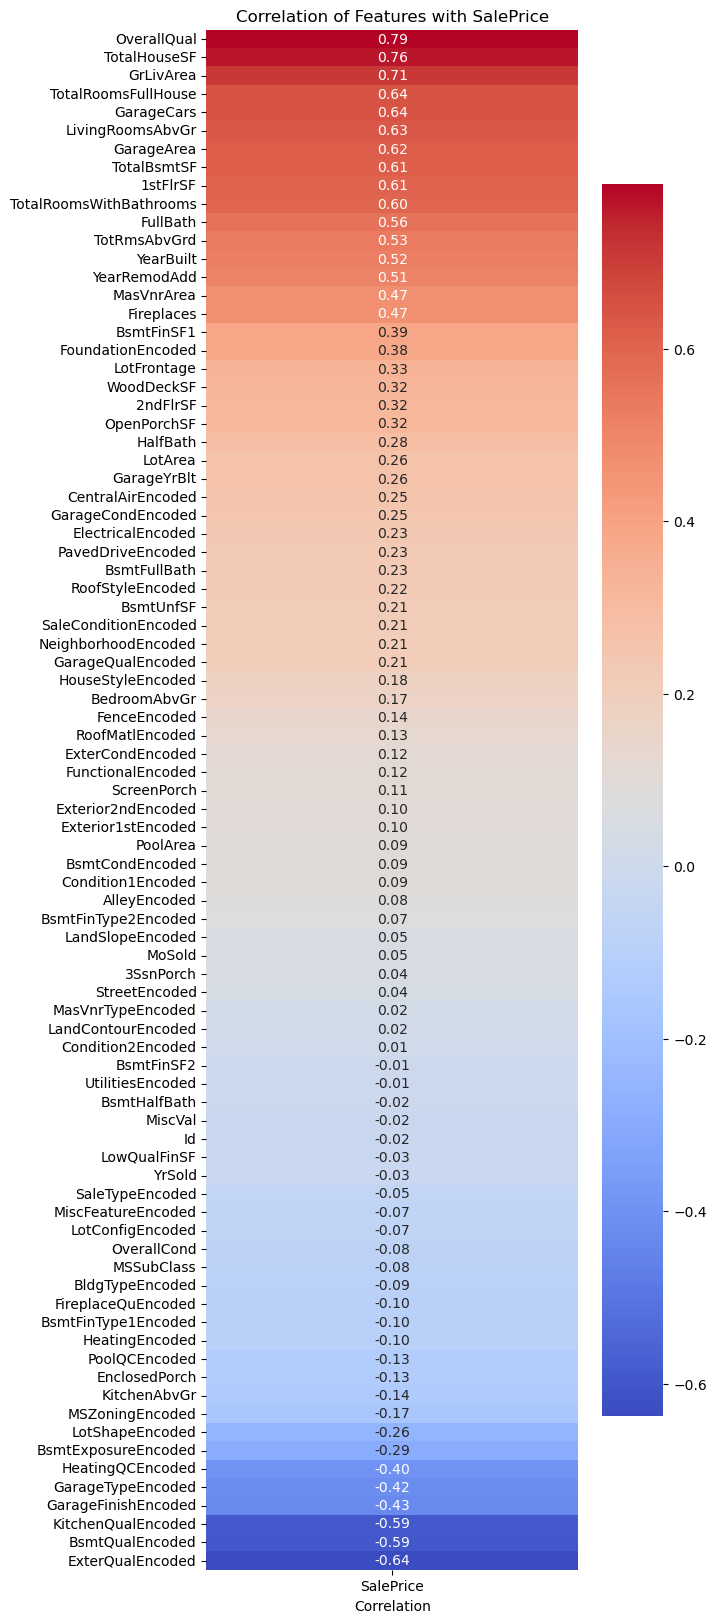

In [419]:
correlations = numeric_data.corr()['SalePrice'].drop('SalePrice')

# columns_to_drop = correlations[correlations.abs() < 0.4].index
# columns_to_drop = columns_to_drop[columns_to_drop != 'id']

# train = train.drop(columns=columns_to_drop)
# test = test.drop(columns=columns_to_drop)
plt.figure(figsize=(6, 20))
sns.heatmap(correlations.to_frame().sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={"shrink": 0.8})
plt.title('Correlation of Features with SalePrice')
plt.xlabel('Correlation')
plt.show()

In [420]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

In [421]:
from sklearn.metrics import mean_squared_error

def evaluate_rmse_log(y_test, y_pred):
  y_test_log = np.log(y_test)
  y_pred_log = np.log(y_pred)

  rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

  print(f'Root Mean Squared Error (RMSE) on log-transformed values: {rmse_log}')

In [422]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20)

log_reg = LinearRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

evaluate_rmse_log(y_test, y_pred)

Root Mean Squared Error (RMSE) on log-transformed values: 0.16802499584082695


In [423]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1, n_estimators=512)
rf_model.fit(X_train, y_train)
rf_val_predictions = rf_model.predict(X_test)

evaluate_rmse_log(y_test, rf_val_predictions)

Root Mean Squared Error (RMSE) on log-transformed values: 0.13951750703363797


In [452]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.75,
    colsample_bytree=0.75,
    random_state=1
)

xgb_model.fit(
  X_train,
  y_train,
  eval_set=[(X_test, y_test)]
)

y_pred = xgb_model.predict(X_test)

evaluate_rmse_log(y_test, y_pred)

[0]	validation_0-rmse:79287.26558
[1]	validation_0-rmse:74004.92787
[2]	validation_0-rmse:70079.28305
[3]	validation_0-rmse:66085.32095
[4]	validation_0-rmse:62163.98629
[5]	validation_0-rmse:58812.44256
[6]	validation_0-rmse:55969.54187
[7]	validation_0-rmse:53650.77019
[8]	validation_0-rmse:50759.98348
[9]	validation_0-rmse:48991.38903
[10]	validation_0-rmse:46478.79849
[11]	validation_0-rmse:45151.09248
[12]	validation_0-rmse:43551.51596
[13]	validation_0-rmse:41876.45571
[14]	validation_0-rmse:40467.38683
[15]	validation_0-rmse:39556.00517
[16]	validation_0-rmse:38005.97569
[17]	validation_0-rmse:37263.75571
[18]	validation_0-rmse:36845.40753
[19]	validation_0-rmse:35741.03622
[20]	validation_0-rmse:34834.01529
[21]	validation_0-rmse:34006.80693
[22]	validation_0-rmse:33747.70359
[23]	validation_0-rmse:33327.18969
[24]	validation_0-rmse:32978.65818
[25]	validation_0-rmse:32645.40863
[26]	validation_0-rmse:32070.63757
[27]	validation_0-rmse:31696.04077
[28]	validation_0-rmse:31153.2

In [431]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.75],
    'colsample_bytree': [0.6, 0.75],
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1), param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [435]:
temp = best_model.predict(X_test)
evaluate_rmse_log(y_test, temp)


Root Mean Squared Error (RMSE) on log-transformed values: 0.12586200623723565


In [453]:
test_preds = xgb_model.predict(test)

In [454]:
output = pd.DataFrame({'Id': test_id, 'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)